# OpenAI Taxi-v3

#### Necessary imports

In [119]:
import numpy as np
import random
import gym
import matplotlib.pyplot as plt

#### Setup

In [120]:
env = gym.make("Taxi-v3", render_mode = "ansi")
env.reset()
discount = 0.99
alpha = 0.1
epsilon = 0.1
num_episodes = 5000

Useful default parameters for the environment:
- num_actions = 6 (env.action_space.n)
- num_states = 500 (use env.s to get the current state)
- action space contains south, north, east, west, pickup, dropoff
- taxiRow, taxiCol, passIdx, destIdx = env.decode(env.s)

### Agent 1: On-policy Monte Carlo

Epsilon-greedy policy

In [121]:
def epsilon_greedy(Q, state, epsilon, n_actions):
    if random.uniform(0, 1) > epsilon:
        action = np.argmax(Q[state, :])
    else:
        action = np.random.choice(n_actions)
    return action

Create episode

In [122]:
def generate_episode(env, Q, epsilon, n_actions):
    state = env.reset()
    episode = []
    done = False
    while not done:
        action = epsilon_greedy(Q, state, epsilon, n_actions)
        next_state, reward, done, somedict = env.step(action)
        episode.append((state, action, reward))
        state = next_state
    return episode

Monte Carlo Control

In [123]:
def on_policy_monte_carlo(env, num_episodes, epsilon, gamma, alpha):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    returns = {(state, action): [] for state in range(env.observation_space.n) for action in range(env.action_space.n)}
    state_count = np.zeros(env.observation_space.n)
    rewards = np.zeros(num_episodes)
    unique_states = np.zeros(num_episodes)
    for i in range(num_episodes):
        episode = generate_episode(env, Q, epsilon, env.action_space.n)
        G = 0
        for t in range(len(episode)-1, -1, -1):
            state, action, reward = episode[t]
            G = gamma*G + reward
            returns[(state, action)].append(G)
            Q[state, action] += alpha * (np.mean(returns[(state, action)]) - Q[state, action])
            state_count[state] += 1
        rewards[i] = G
        unique_states[i] = len(np.where(state_count > 0)[0])
    return Q, rewards, unique_states

Test run

In [124]:
Q, rewards, unique_states = on_policy_monte_carlo(env, num_episodes, epsilon, discount, alpha)

Plot rewards

<Figure size 640x480 with 0 Axes>

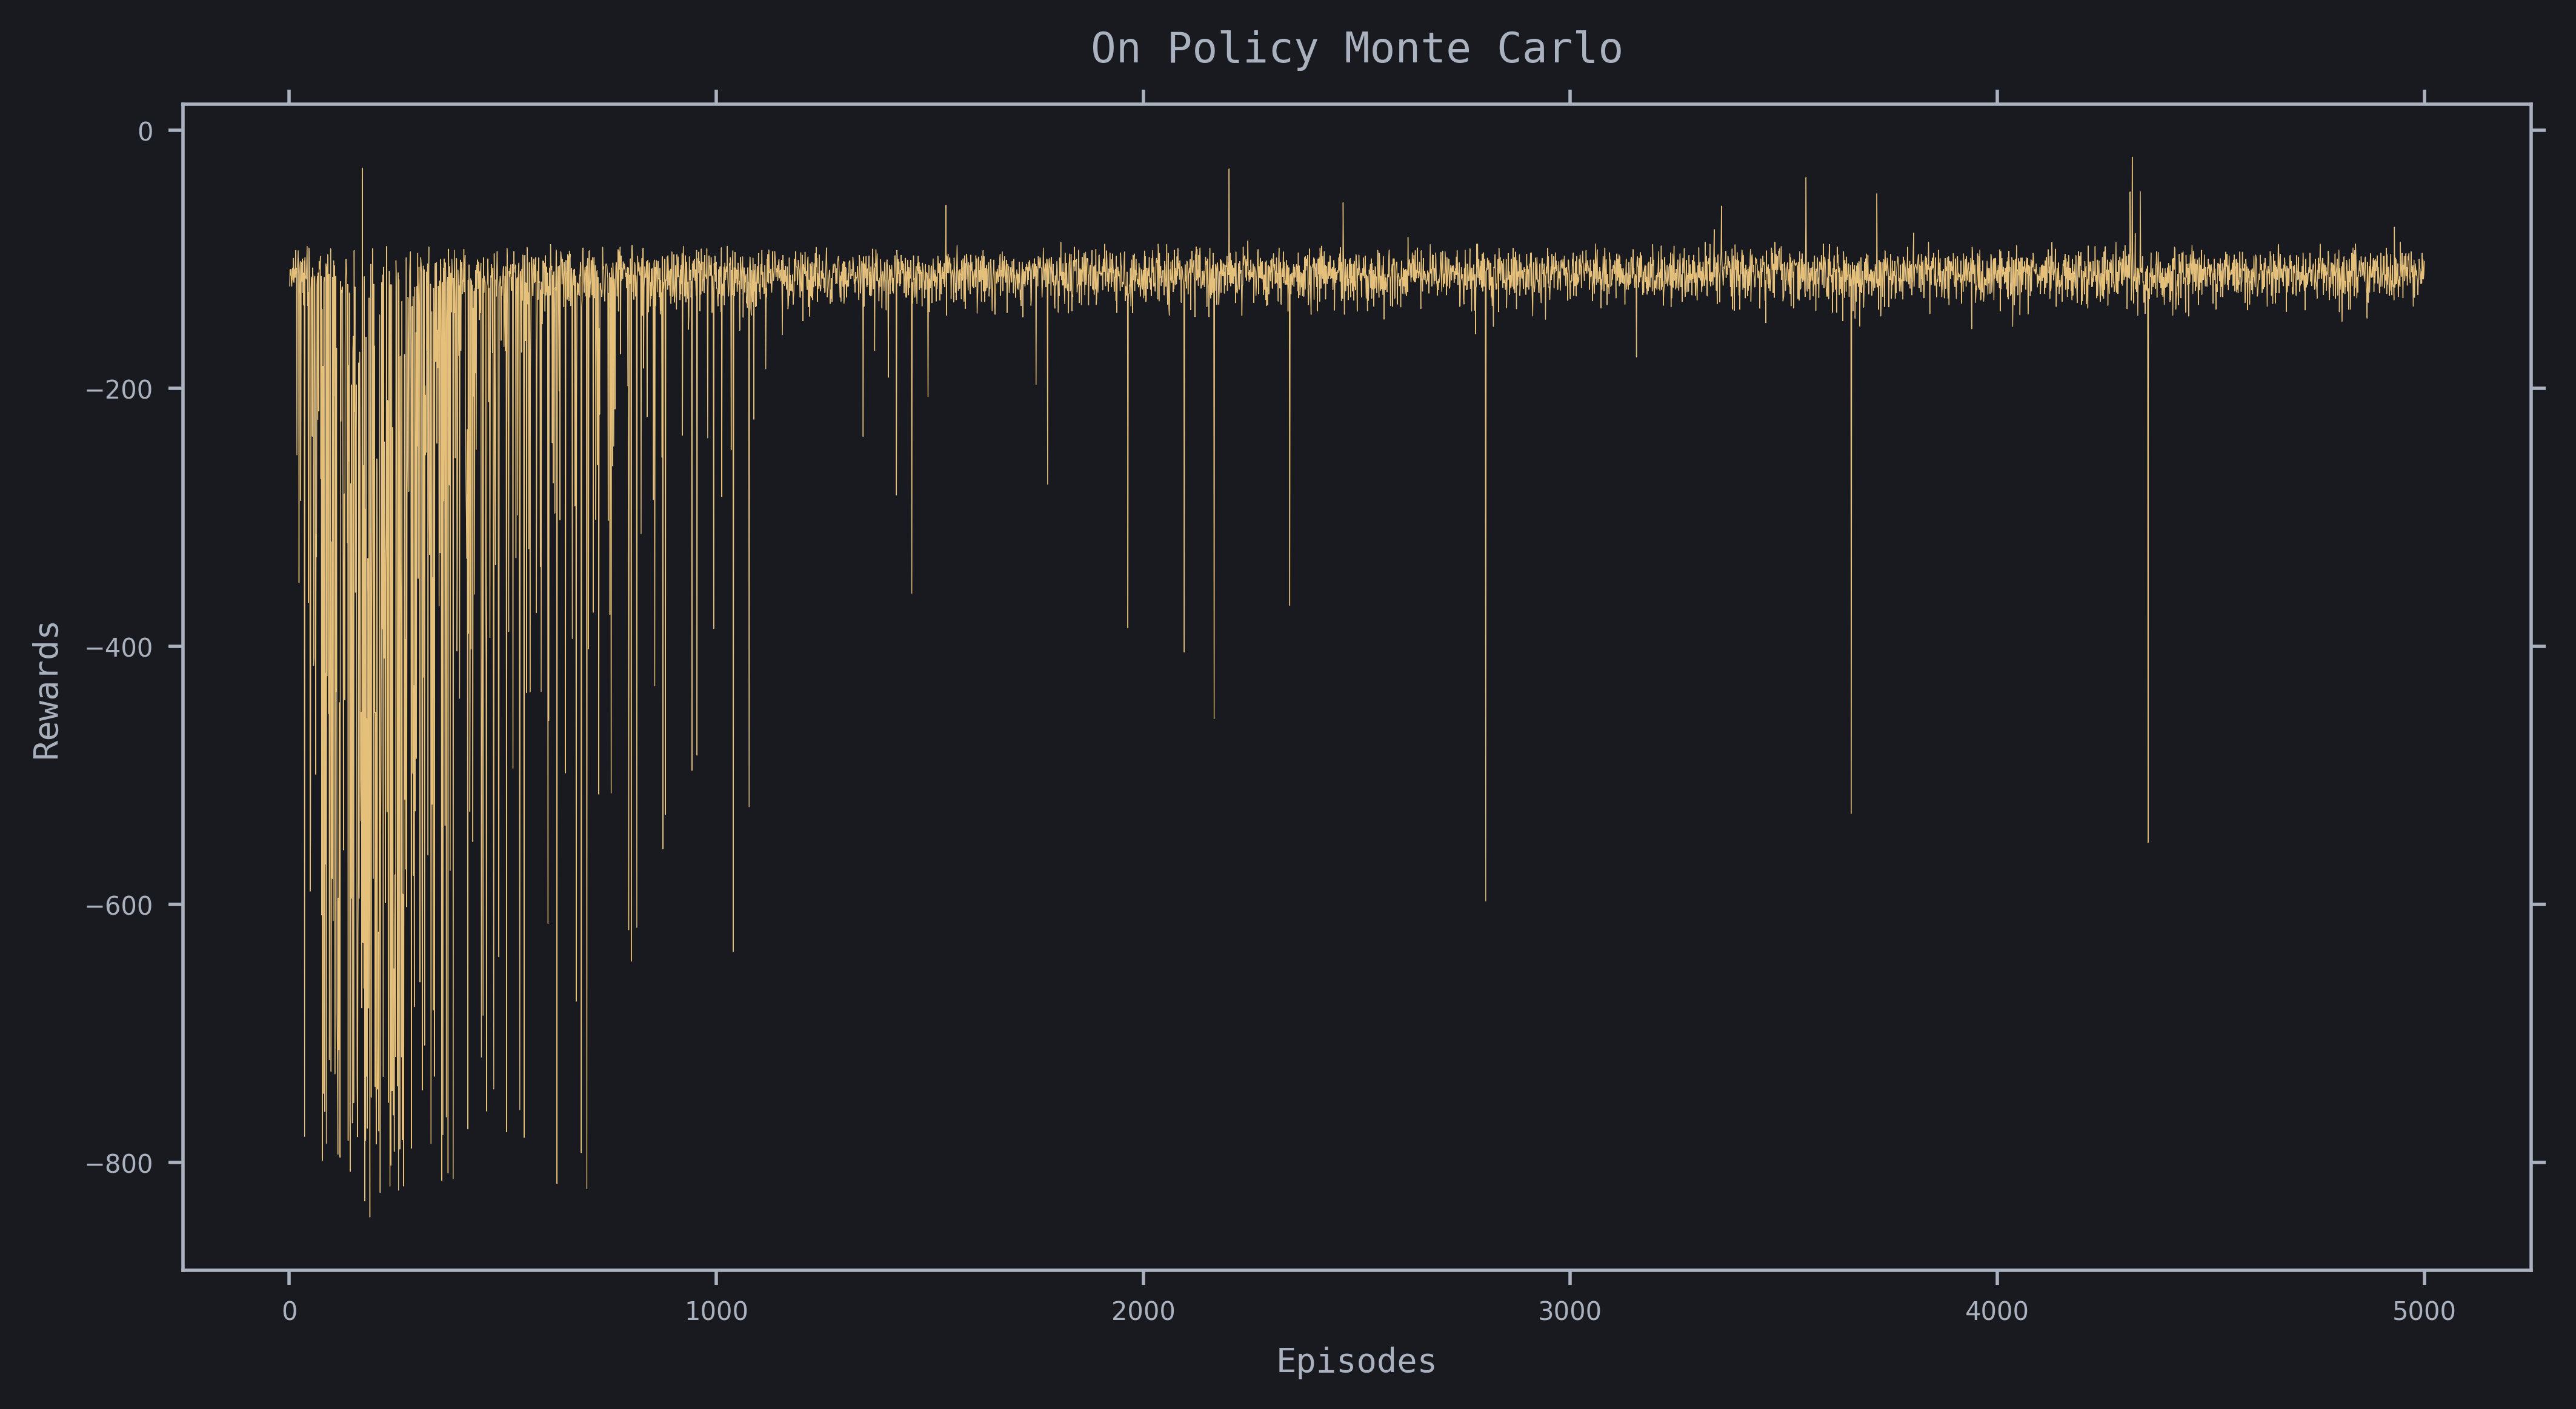

In [125]:
episodes = np.arange(1, num_episodes+1)
plt.clf()
plt.figure(figsize=(10, 5), dpi = 500, facecolor='#181A1F')
ax = plt.axes()
ax.set_facecolor('#181A1F')
plt.title("On Policy Monte Carlo", fontsize=10, color='#abb2bf', font = 'Monospace', pad = 10)
plt.xlabel("Episodes", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plt.ylabel("Rewards", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plotColors = ["#e5c07b", "#e06c75", "#61afef", "#98c379", "#c678dd", "#56b6c2", "#d19a66"]
plt.plot(episodes, rewards, color = plotColors[0], linewidth=0.2)
plt.tick_params(axis='both', which='major', labelsize=6)
ax.spines['bottom'].set_color('#abb2bf')
ax.spines['top'].set_color('#abb2bf')
ax.spines['left'].set_color('#abb2bf')
ax.spines['right'].set_color('#abb2bf')
ax.tick_params(axis='x', colors='#abb2bf')
ax.tick_params(axis='y', colors='#abb2bf')
plt.rcParams['axes.facecolor'] = '#1c1d27'
plt.rcParams['axes.titlecolor'] = '#abb2bf'
plt.rcParams['axes.edgecolor'] = '#abb2bf'
plt.rcParams['axes.labelcolor'] = '#abb2bf'
plt.rcParams['figure.facecolor'] = '#1c1d27'
plt.rcParams['legend.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.color'] = '#1bb2bf'
plt.rcParams['ytick.color'] = '#1bb2bf'
plt.rcParams['text.color'] = '#abb2bf'
plt.rcParams['xtick.labelcolor'] = '#abb2bf'
plt.rcParams['ytick.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.show()

Plot states

<Figure size 640x480 with 0 Axes>

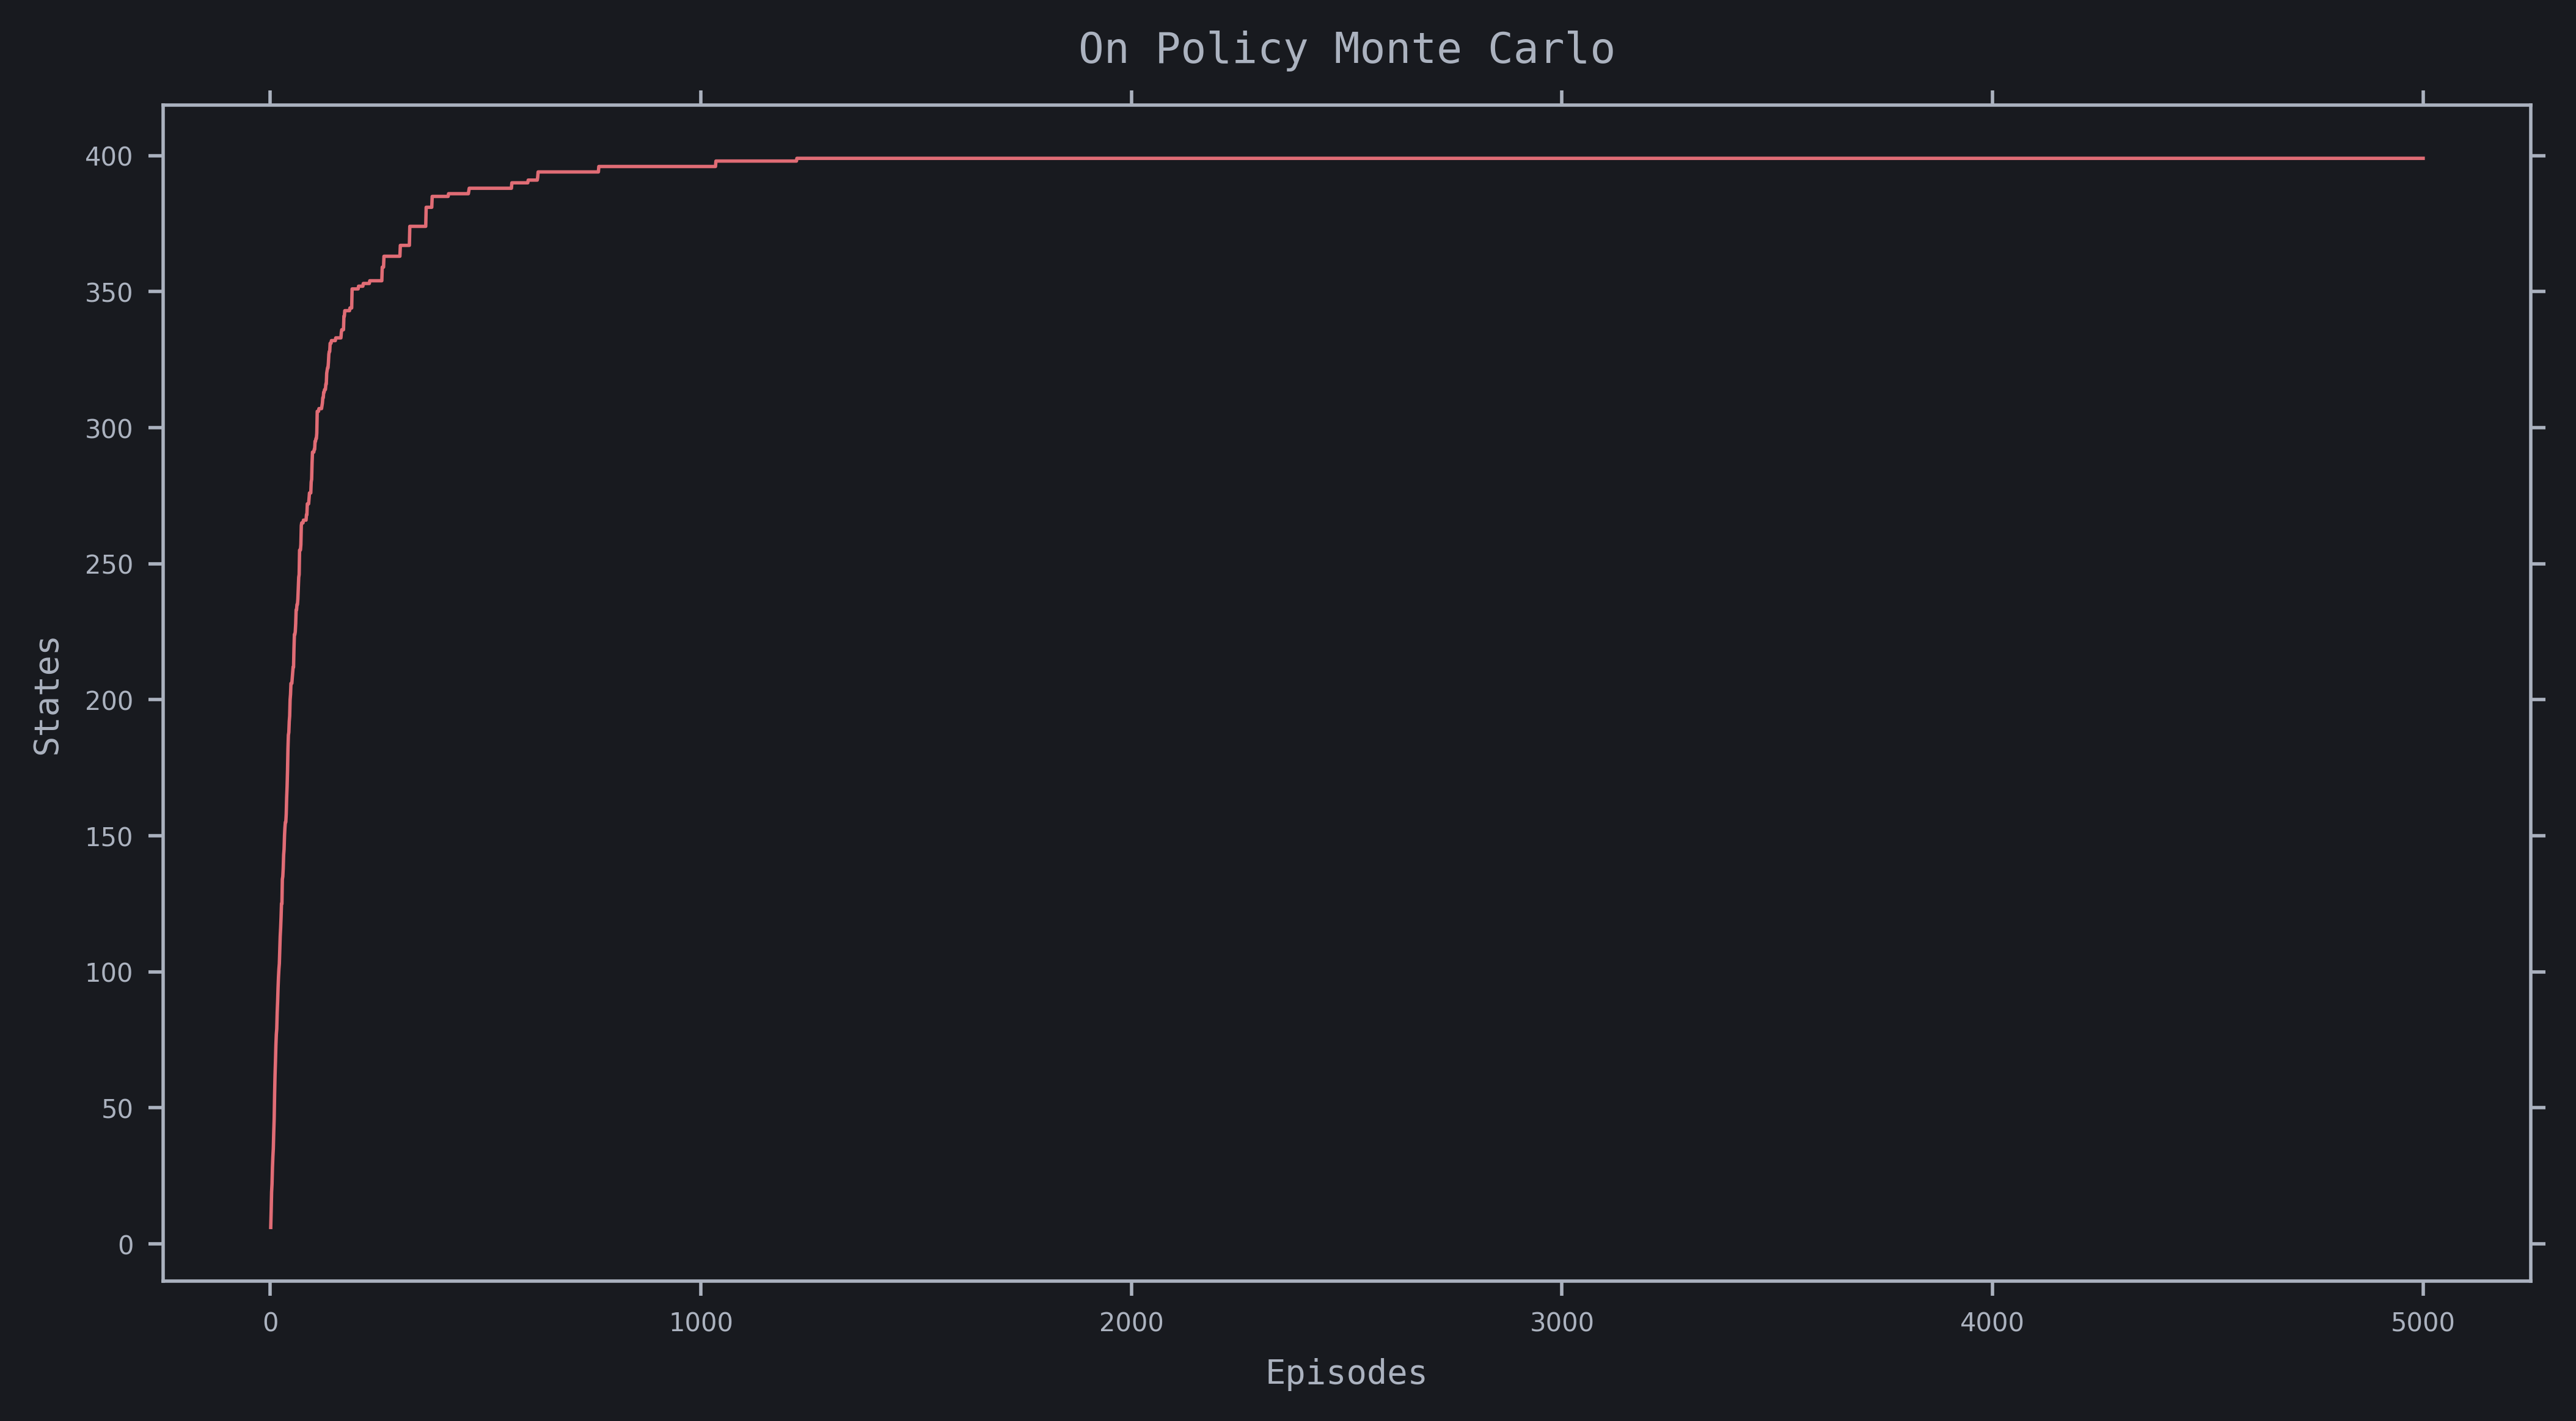

In [126]:
plt.clf()
plt.figure(figsize=(10, 5), dpi = 500, facecolor='#181A1F')
ax = plt.axes()
ax.set_facecolor('#181A1F')
plt.title("On Policy Monte Carlo", fontsize=10, color='#abb2bf', font = 'Monospace', pad = 10)
plt.xlabel("Episodes", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plt.ylabel("States", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plotColors = ["#e5c07b", "#e06c75", "#61afef", "#98c379", "#c678dd", "#56b6c2", "#d19a66"]
plt.plot(episodes, unique_states, color = plotColors[1], linewidth=0.8)
plt.tick_params(axis='both', which='major', labelsize=6)
ax.spines['bottom'].set_color('#abb2bf')
ax.spines['top'].set_color('#abb2bf')
ax.spines['left'].set_color('#abb2bf')
ax.spines['right'].set_color('#abb2bf')
ax.tick_params(axis='x', colors='#abb2bf')
ax.tick_params(axis='y', colors='#abb2bf')
plt.rcParams['axes.facecolor'] = '#1c1d27'
plt.rcParams['axes.titlecolor'] = '#abb2bf'
plt.rcParams['axes.edgecolor'] = '#abb2bf'
plt.rcParams['axes.labelcolor'] = '#abb2bf'
plt.rcParams['figure.facecolor'] = '#1c1d27'
plt.rcParams['legend.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.color'] = '#1bb2bf'
plt.rcParams['ytick.color'] = '#1bb2bf'
plt.rcParams['text.color'] = '#abb2bf'
plt.rcParams['xtick.labelcolor'] = '#abb2bf'
plt.rcParams['ytick.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.show()

### Agent 2: Off-policy Monte Carlo

Setup

In [127]:
env = gym.make('Taxi-v3', render_mode="ansi")
env.reset()
num_episodes = 20000
epsilon = 0.1
gamma = 0.99
alpha = 0.1

Epsilon-greedy policy

In [128]:
def epsilon_greedy(Q, state, epsilon, n_actions):
    if random.uniform(0, 1) > epsilon:
        action = np.argmax(Q[state, :])
    else:
        action = np.random.choice(n_actions)
    return action

Create episode

In [129]:
def generate_episode(env, Q_behavior, epsilon, n_actions):
    episode = []
    state = env.reset()
    done = False
    while not done:
        action = epsilon_greedy(Q_behavior, state, epsilon, n_actions)
        next_state, reward, done, somedict = env.step(action)
        episode.append((state, action, reward))
        state = next_state
    return episode

Off-policy Monte Carlo

In [130]:
def off_policy_monte_carlo(env, num_episodes, epsilon, gamma, alpha):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    C = np.zeros((env.observation_space.n, env.action_space.n))
    Q_behavior = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = np.zeros(num_episodes)
    unique_states = np.zeros(num_episodes)
    state_count = np.zeros(env.observation_space.n)
    for i in range(num_episodes):
        episode = generate_episode(env, Q_behavior, epsilon, env.action_space.n)
        G = 0
        W = 1
        for t in range(len(episode)-1, -1, -1):
            state, action, reward = episode[t]
            G = gamma*G + reward
            C[state, action] += W
            Q[state, action] += alpha*W/C[state, action]*(G - Q[state, action])
            state_count[state] += 1
            if action != np.argmax(Q_behavior[state, :]):
                break
            W = W/epsilon
        rewards[i] = G
        unique_states[i] = len(np.where(state_count > 0)[0])
    return Q, rewards, unique_states

Test

In [131]:
Q, rewards, unique_states = off_policy_monte_carlo(env, num_episodes, epsilon, gamma, alpha)

Plot rewards

<Figure size 640x480 with 0 Axes>

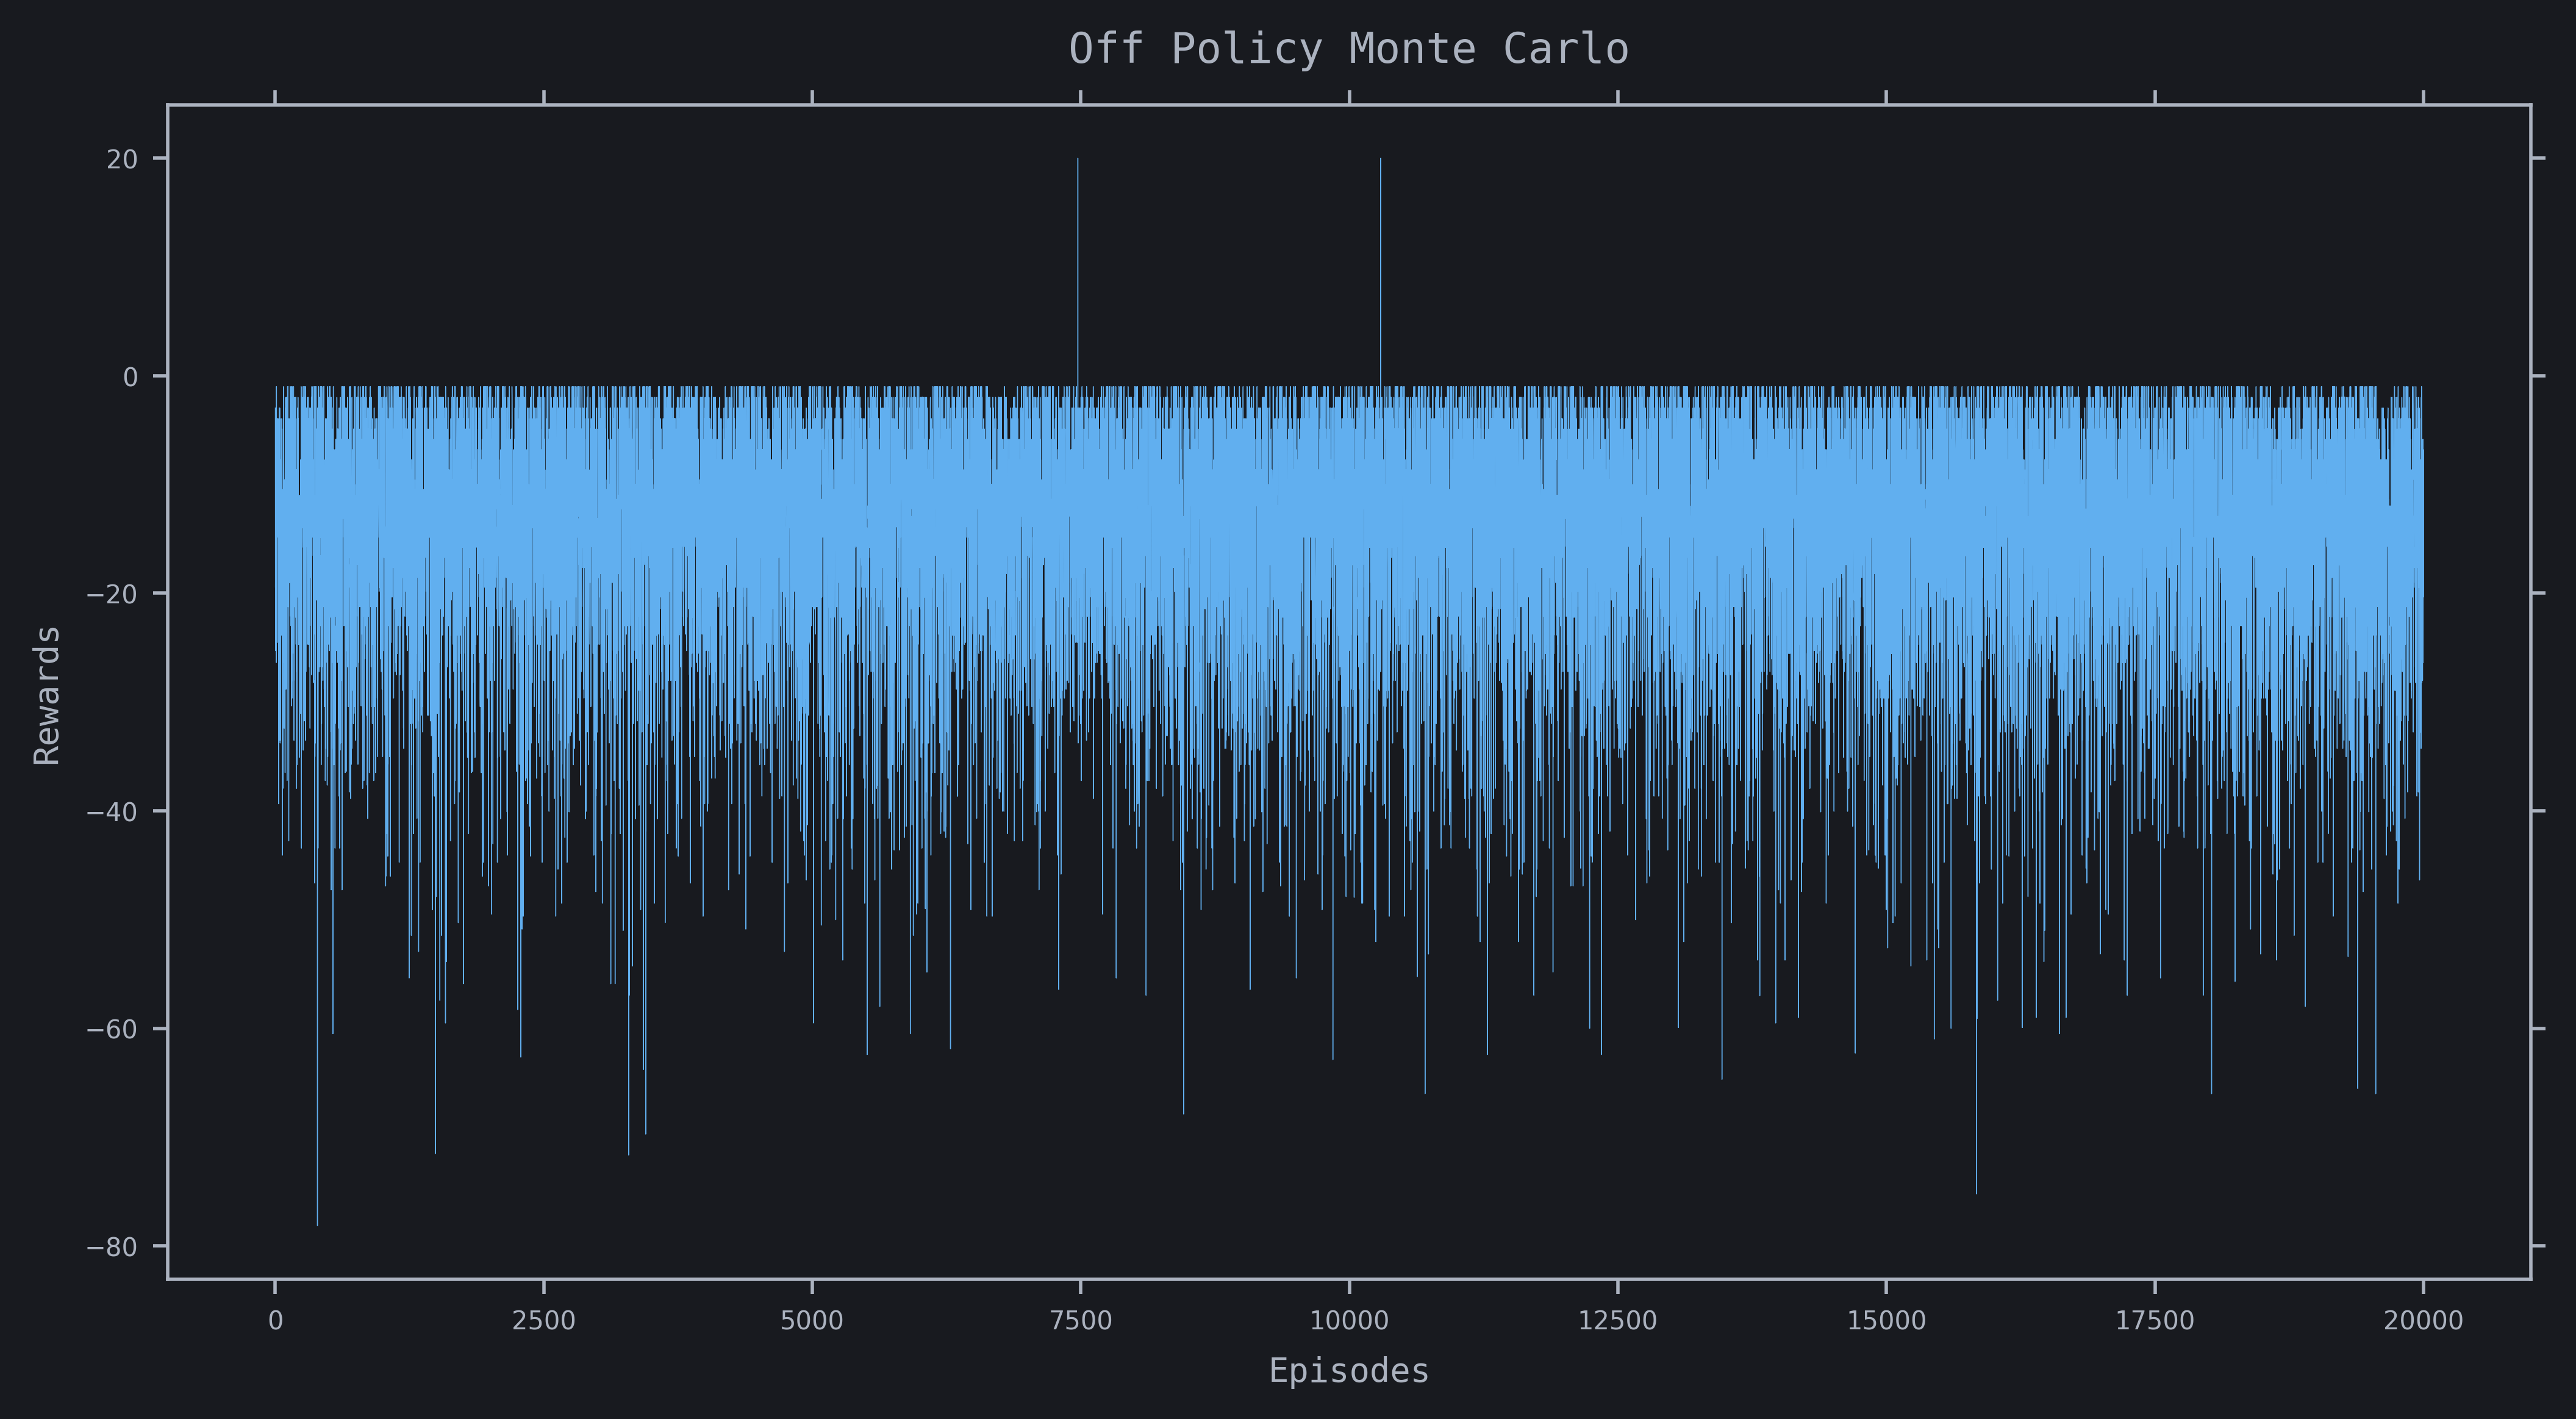

In [132]:
episodes = np.arange(1, num_episodes+1)
plt.clf()
plt.figure(figsize=(10, 5), dpi = 500, facecolor='#181A1F')
ax = plt.axes()
ax.set_facecolor('#181A1F')
plt.title("Off Policy Monte Carlo", fontsize=10, color='#abb2bf', font = 'Monospace', pad = 10)
plt.xlabel("Episodes", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plt.ylabel("Rewards", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plotColors = ["#e5c07b", "#e06c75", "#61afef", "#98c379", "#c678dd", "#56b6c2", "#d19a66"]
plt.plot(episodes, rewards, color = plotColors[2], linewidth=0.2)
plt.tick_params(axis='both', which='major', labelsize=6)
ax.spines['bottom'].set_color('#abb2bf')
ax.spines['top'].set_color('#abb2bf')
ax.spines['left'].set_color('#abb2bf')
ax.spines['right'].set_color('#abb2bf')
ax.tick_params(axis='x', colors='#abb2bf')
ax.tick_params(axis='y', colors='#abb2bf')
plt.rcParams['axes.facecolor'] = '#1c1d27'
plt.rcParams['axes.titlecolor'] = '#abb2bf'
plt.rcParams['axes.edgecolor'] = '#abb2bf'
plt.rcParams['axes.labelcolor'] = '#abb2bf'
plt.rcParams['figure.facecolor'] = '#1c1d27'
plt.rcParams['legend.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.color'] = '#1bb2bf'
plt.rcParams['ytick.color'] = '#1bb2bf'
plt.rcParams['text.color'] = '#abb2bf'
plt.rcParams['xtick.labelcolor'] = '#abb2bf'
plt.rcParams['ytick.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.show()

Plot states

<Figure size 640x480 with 0 Axes>

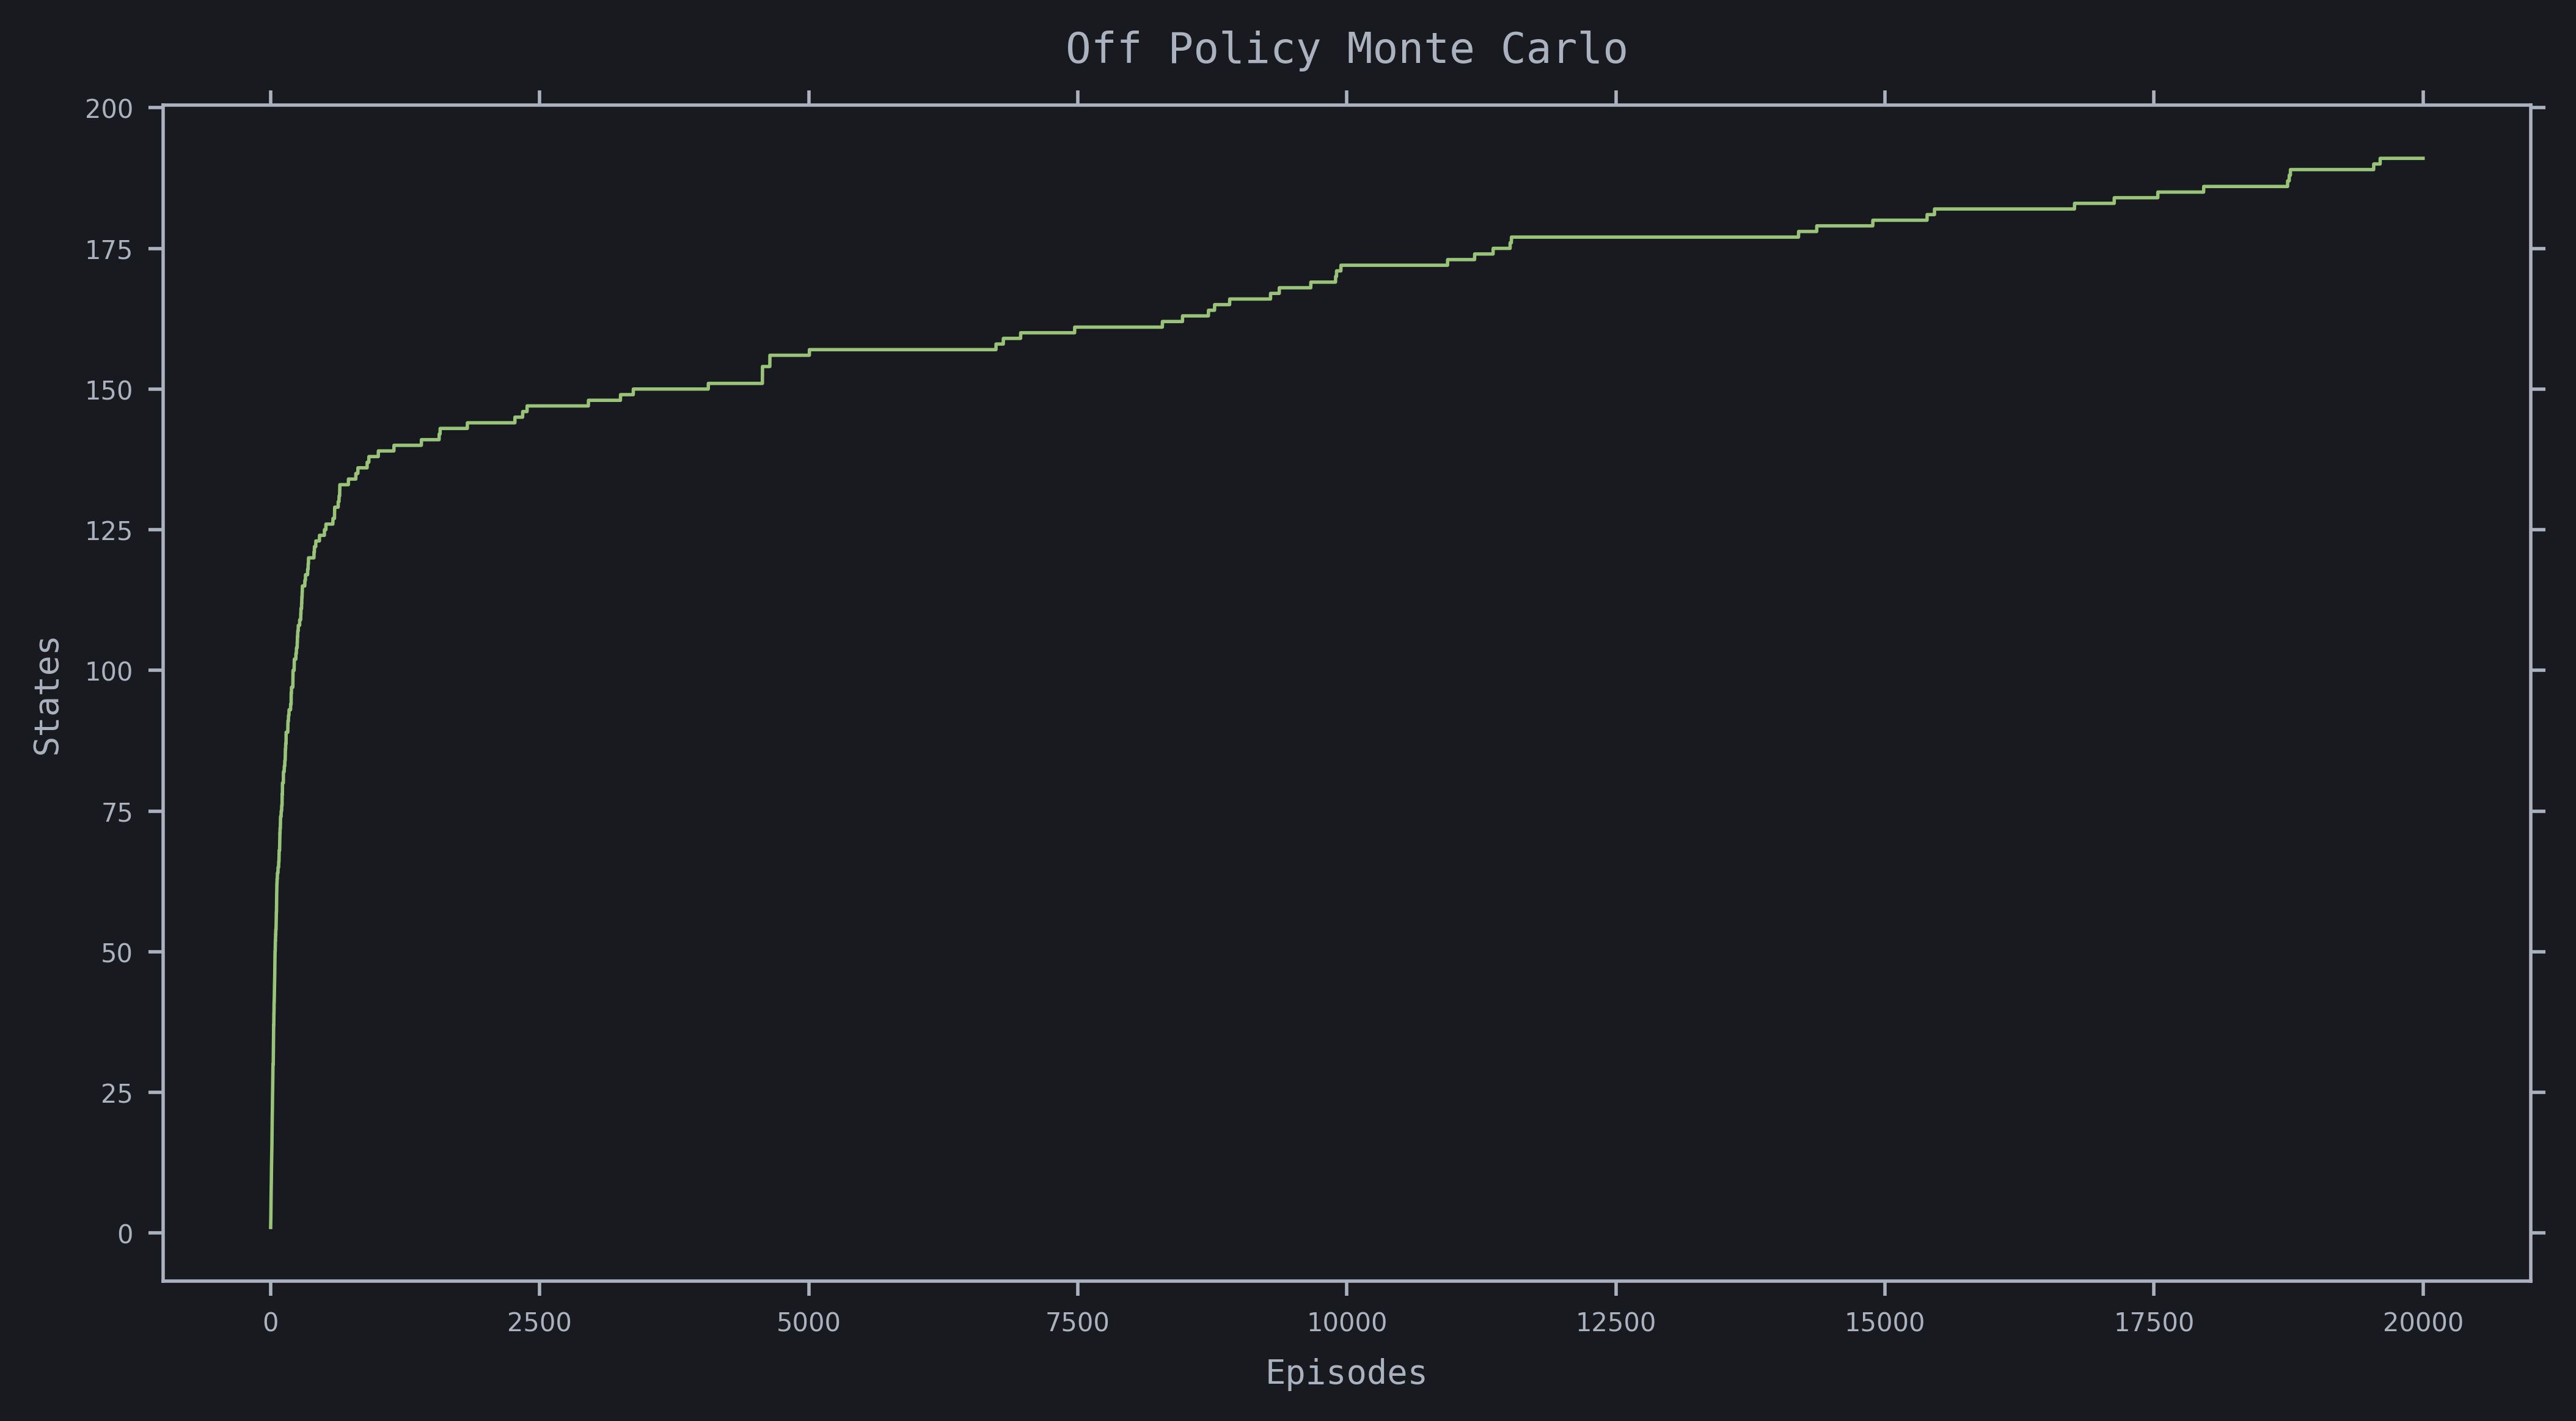

In [133]:
plt.clf()
plt.figure(figsize=(10, 5), dpi = 500, facecolor='#181A1F')
ax = plt.axes()
ax.set_facecolor('#181A1F')
plt.title("Off Policy Monte Carlo", fontsize=10, color='#abb2bf', font = 'Monospace', pad = 10)
plt.xlabel("Episodes", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plt.ylabel("States", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plotColors = ["#e5c07b", "#e06c75", "#61afef", "#98c379", "#c678dd", "#56b6c2", "#d19a66"]
plt.plot(episodes, unique_states, color = plotColors[3], linewidth=0.8)
plt.tick_params(axis='both', which='major', labelsize=6)
ax.spines['bottom'].set_color('#abb2bf')
ax.spines['top'].set_color('#abb2bf')
ax.spines['left'].set_color('#abb2bf')
ax.spines['right'].set_color('#abb2bf')
ax.tick_params(axis='x', colors='#abb2bf')
ax.tick_params(axis='y', colors='#abb2bf')
plt.rcParams['axes.facecolor'] = '#1c1d27'
plt.rcParams['axes.titlecolor'] = '#abb2bf'
plt.rcParams['axes.edgecolor'] = '#abb2bf'
plt.rcParams['axes.labelcolor'] = '#abb2bf'
plt.rcParams['figure.facecolor'] = '#1c1d27'
plt.rcParams['legend.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.color'] = '#1bb2bf'
plt.rcParams['ytick.color'] = '#1bb2bf'
plt.rcParams['text.color'] = '#abb2bf'
plt.rcParams['xtick.labelcolor'] = '#abb2bf'
plt.rcParams['ytick.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.show()

### Agent 3: Q-Learning

Setup

In [108]:
env = gym.make('Taxi-v3', render_mode="ansi")
env.reset()
num_episodes = 5000
epsilon = 0.1
gamma = 0.99
alpha = 0.1

Epsilon-greedy policy

In [109]:
def epsilon_greedy(Q, state, epsilon, n_actions):
    if random.uniform(0, 1) > epsilon:
        action = np.argmax(Q[state, :])
    else:
        action = np.random.choice(n_actions)
    return action

Q-learning

In [110]:
def q_learning(env, num_episodes, epsilon, gamma, alpha):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = np.zeros(num_episodes)
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        G = 0
        while not done:
            action = epsilon_greedy(Q, state, epsilon, env.action_space.n)
            next_state, reward, done, _ = env.step(action)
            G = gamma*G + reward
            Q[state, action] += alpha*(G + gamma*np.max(Q[next_state, :]) - Q[state, action])
            state = next_state
        rewards[episode] = G
    return Q, rewards

Test

In [111]:
Q, rewards = q_learning(env, num_episodes, epsilon, gamma, alpha)

Plot

<Figure size 640x480 with 0 Axes>

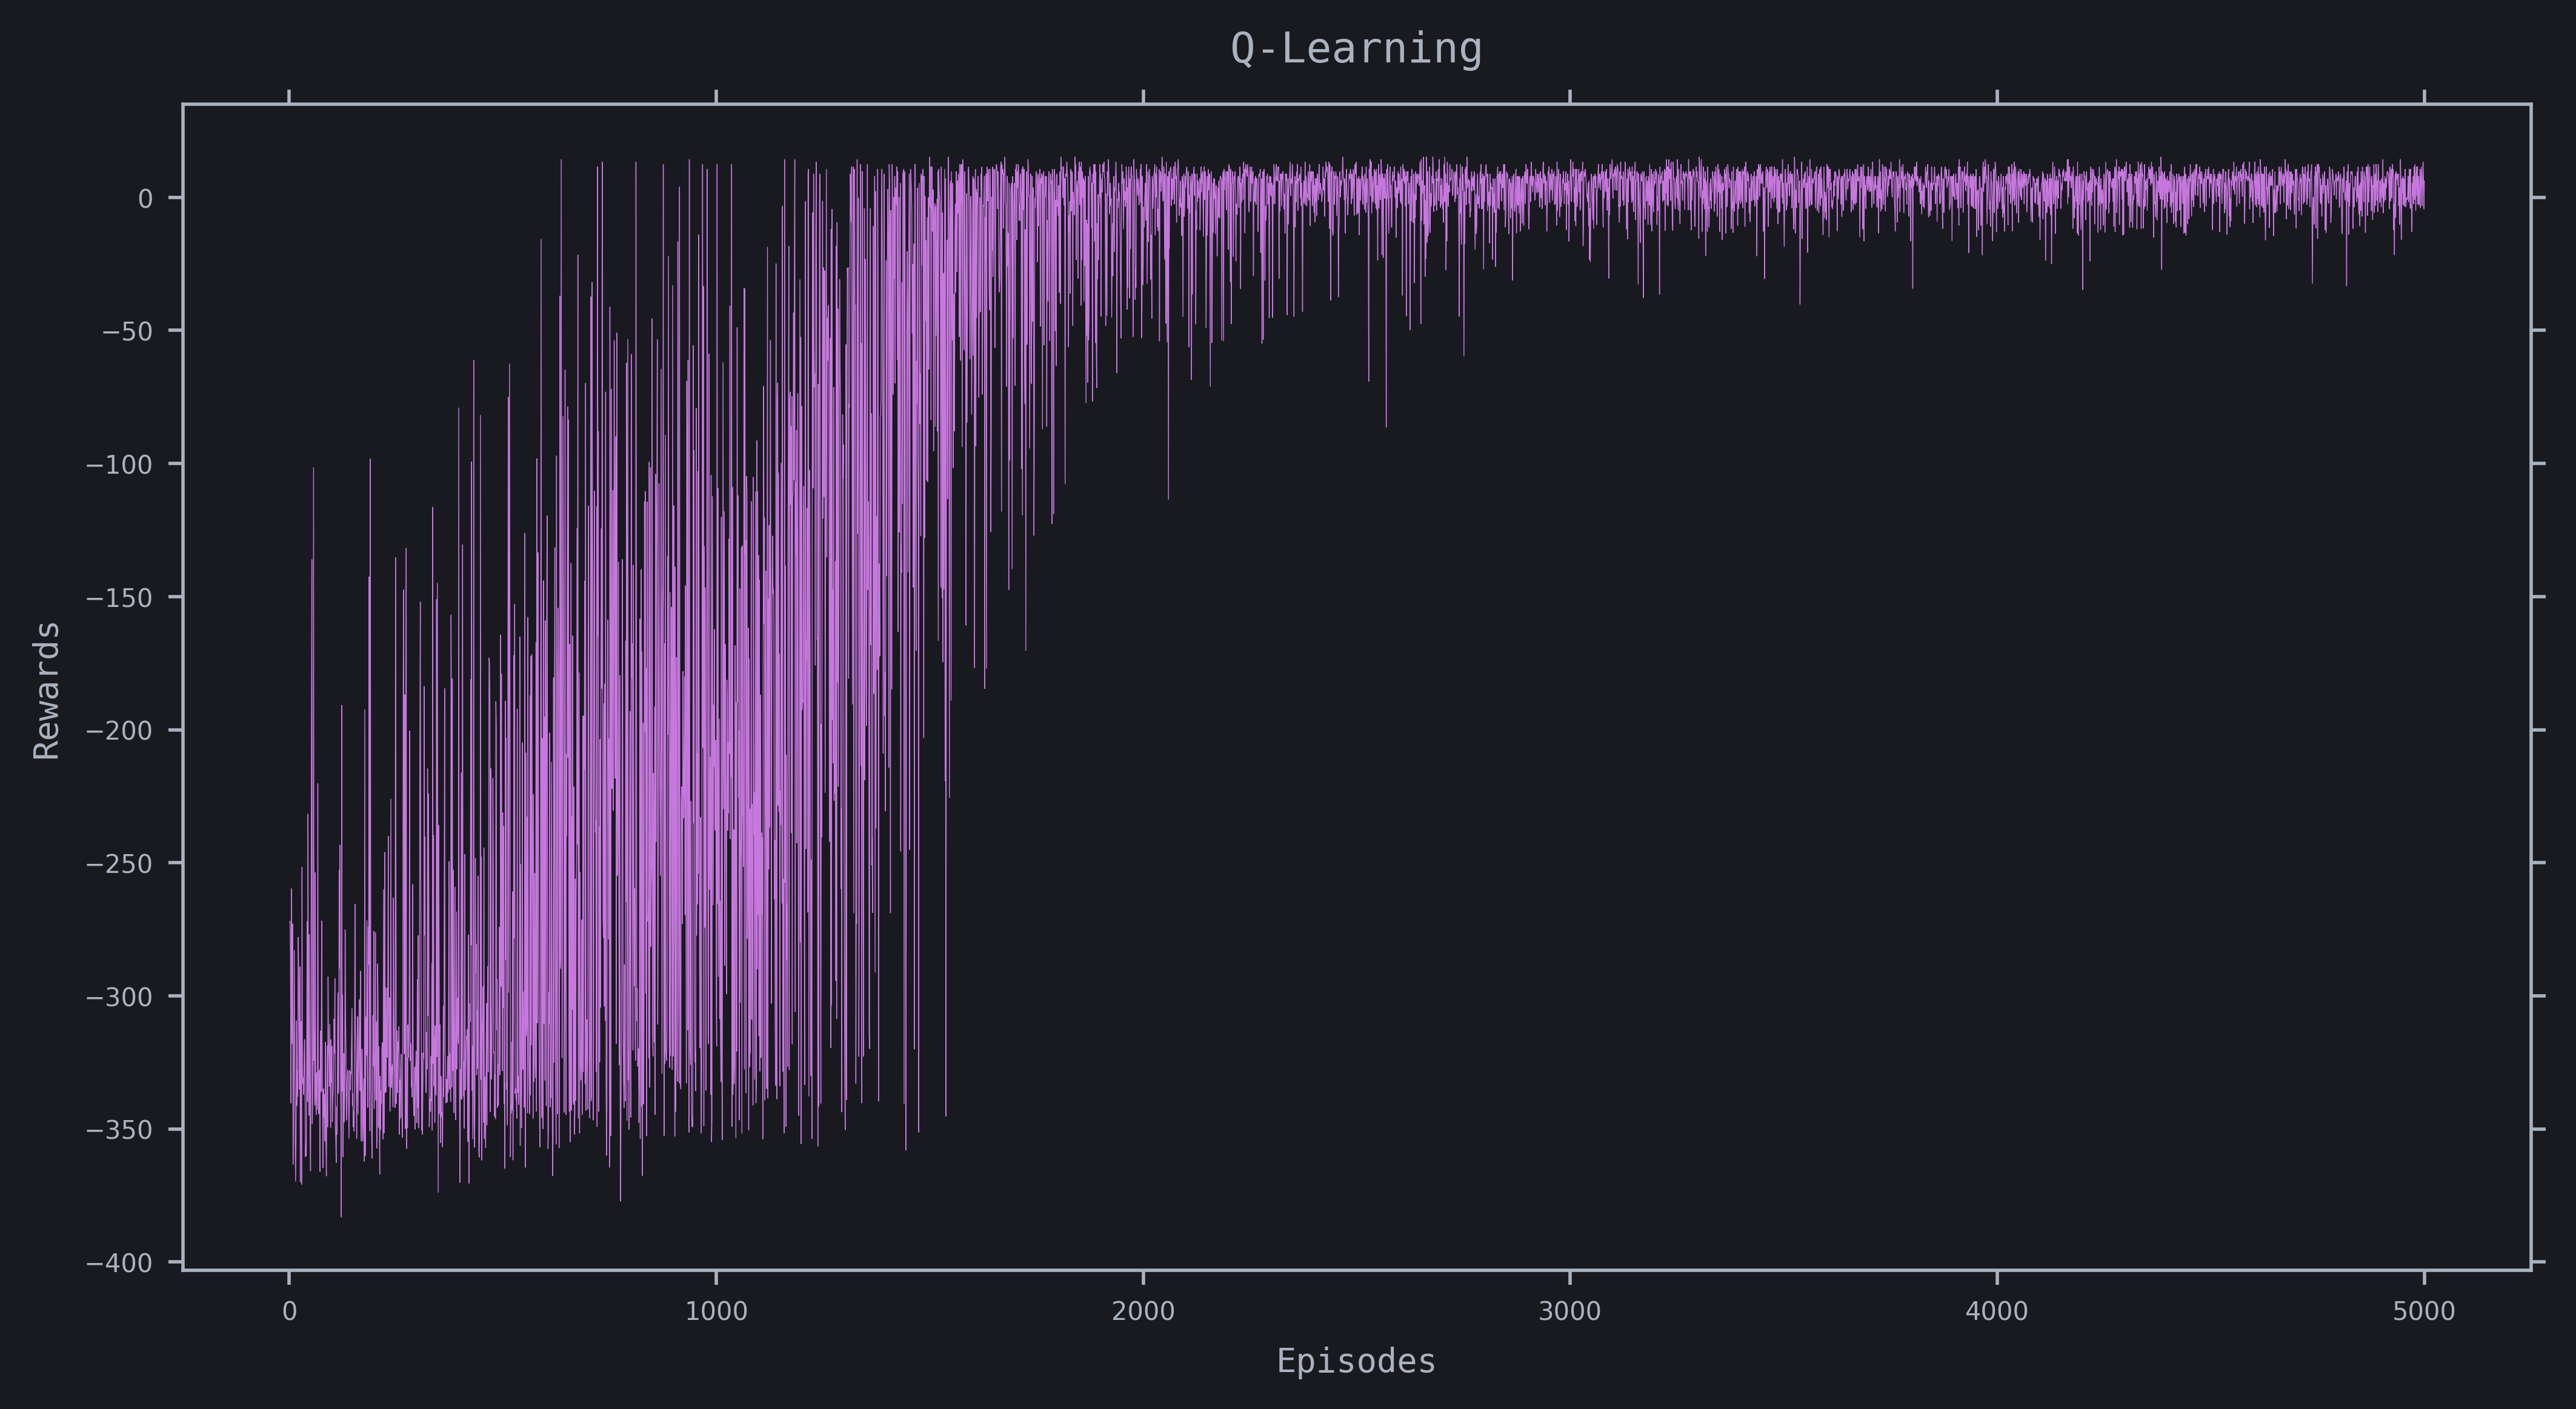

In [112]:
episodes = np.arange(1, num_episodes+1)
plt.clf()
plt.figure(figsize=(10, 5), dpi = 500, facecolor='#181A1F')
ax = plt.axes()
ax.set_facecolor('#181A1F')
plt.title("Q-Learning", fontsize=10, color='#abb2bf', font = 'Monospace', pad = 10)
plt.xlabel("Episodes", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plt.ylabel("Rewards", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plotColors = ["#e5c07b", "#e06c75", "#61afef", "#98c379", "#c678dd", "#56b6c2", "#d19a66"]
plt.plot(episodes, rewards, color = plotColors[4], linewidth=0.2)
plt.tick_params(axis='both', which='major', labelsize=6)
ax.spines['bottom'].set_color('#abb2bf')
ax.spines['top'].set_color('#abb2bf')
ax.spines['left'].set_color('#abb2bf')
ax.spines['right'].set_color('#abb2bf')
ax.tick_params(axis='x', colors='#abb2bf')
ax.tick_params(axis='y', colors='#abb2bf')
plt.rcParams['axes.facecolor'] = '#1c1d27'
plt.rcParams['axes.titlecolor'] = '#abb2bf'
plt.rcParams['axes.edgecolor'] = '#abb2bf'
plt.rcParams['axes.labelcolor'] = '#abb2bf'
plt.rcParams['figure.facecolor'] = '#1c1d27'
plt.rcParams['legend.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.color'] = '#1bb2bf'
plt.rcParams['ytick.color'] = '#1bb2bf'
plt.rcParams['text.color'] = '#abb2bf'
plt.rcParams['xtick.labelcolor'] = '#abb2bf'
plt.rcParams['ytick.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.show()

### Agent 4: SARSA

Setup

In [113]:
env = gym.make('Taxi-v3', render_mode="ansi")
env.reset()
num_episodes = 5000
epsilon = 0.1
gamma = 0.99
alpha = 0.1

Epsilon-greedy policy

In [114]:
def epsilon_greedy(Q, state, epsilon, n_actions):
    if random.uniform(0, 1) > epsilon:
        action = np.argmax(Q[state, :])
    else:
        action = np.random.choice(n_actions)
    return action

SARSA

In [115]:
def sarsa(env, num_episodes, epsilon, gamma, alpha):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = np.zeros(num_episodes)
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        action = epsilon_greedy(Q, state, epsilon, env.action_space.n)
        G = 0
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy(Q, next_state, epsilon, env.action_space.n)
            G = gamma*G + reward
            Q[state, action] += alpha*(G + gamma*Q[next_state, next_action] - Q[state, action])
            state = next_state
            action = next_action
        rewards[episode] = G
    return Q, rewards

Test

In [116]:
Q, rewards = sarsa(env, num_episodes, epsilon, gamma, alpha)

Plot

<Figure size 640x480 with 0 Axes>

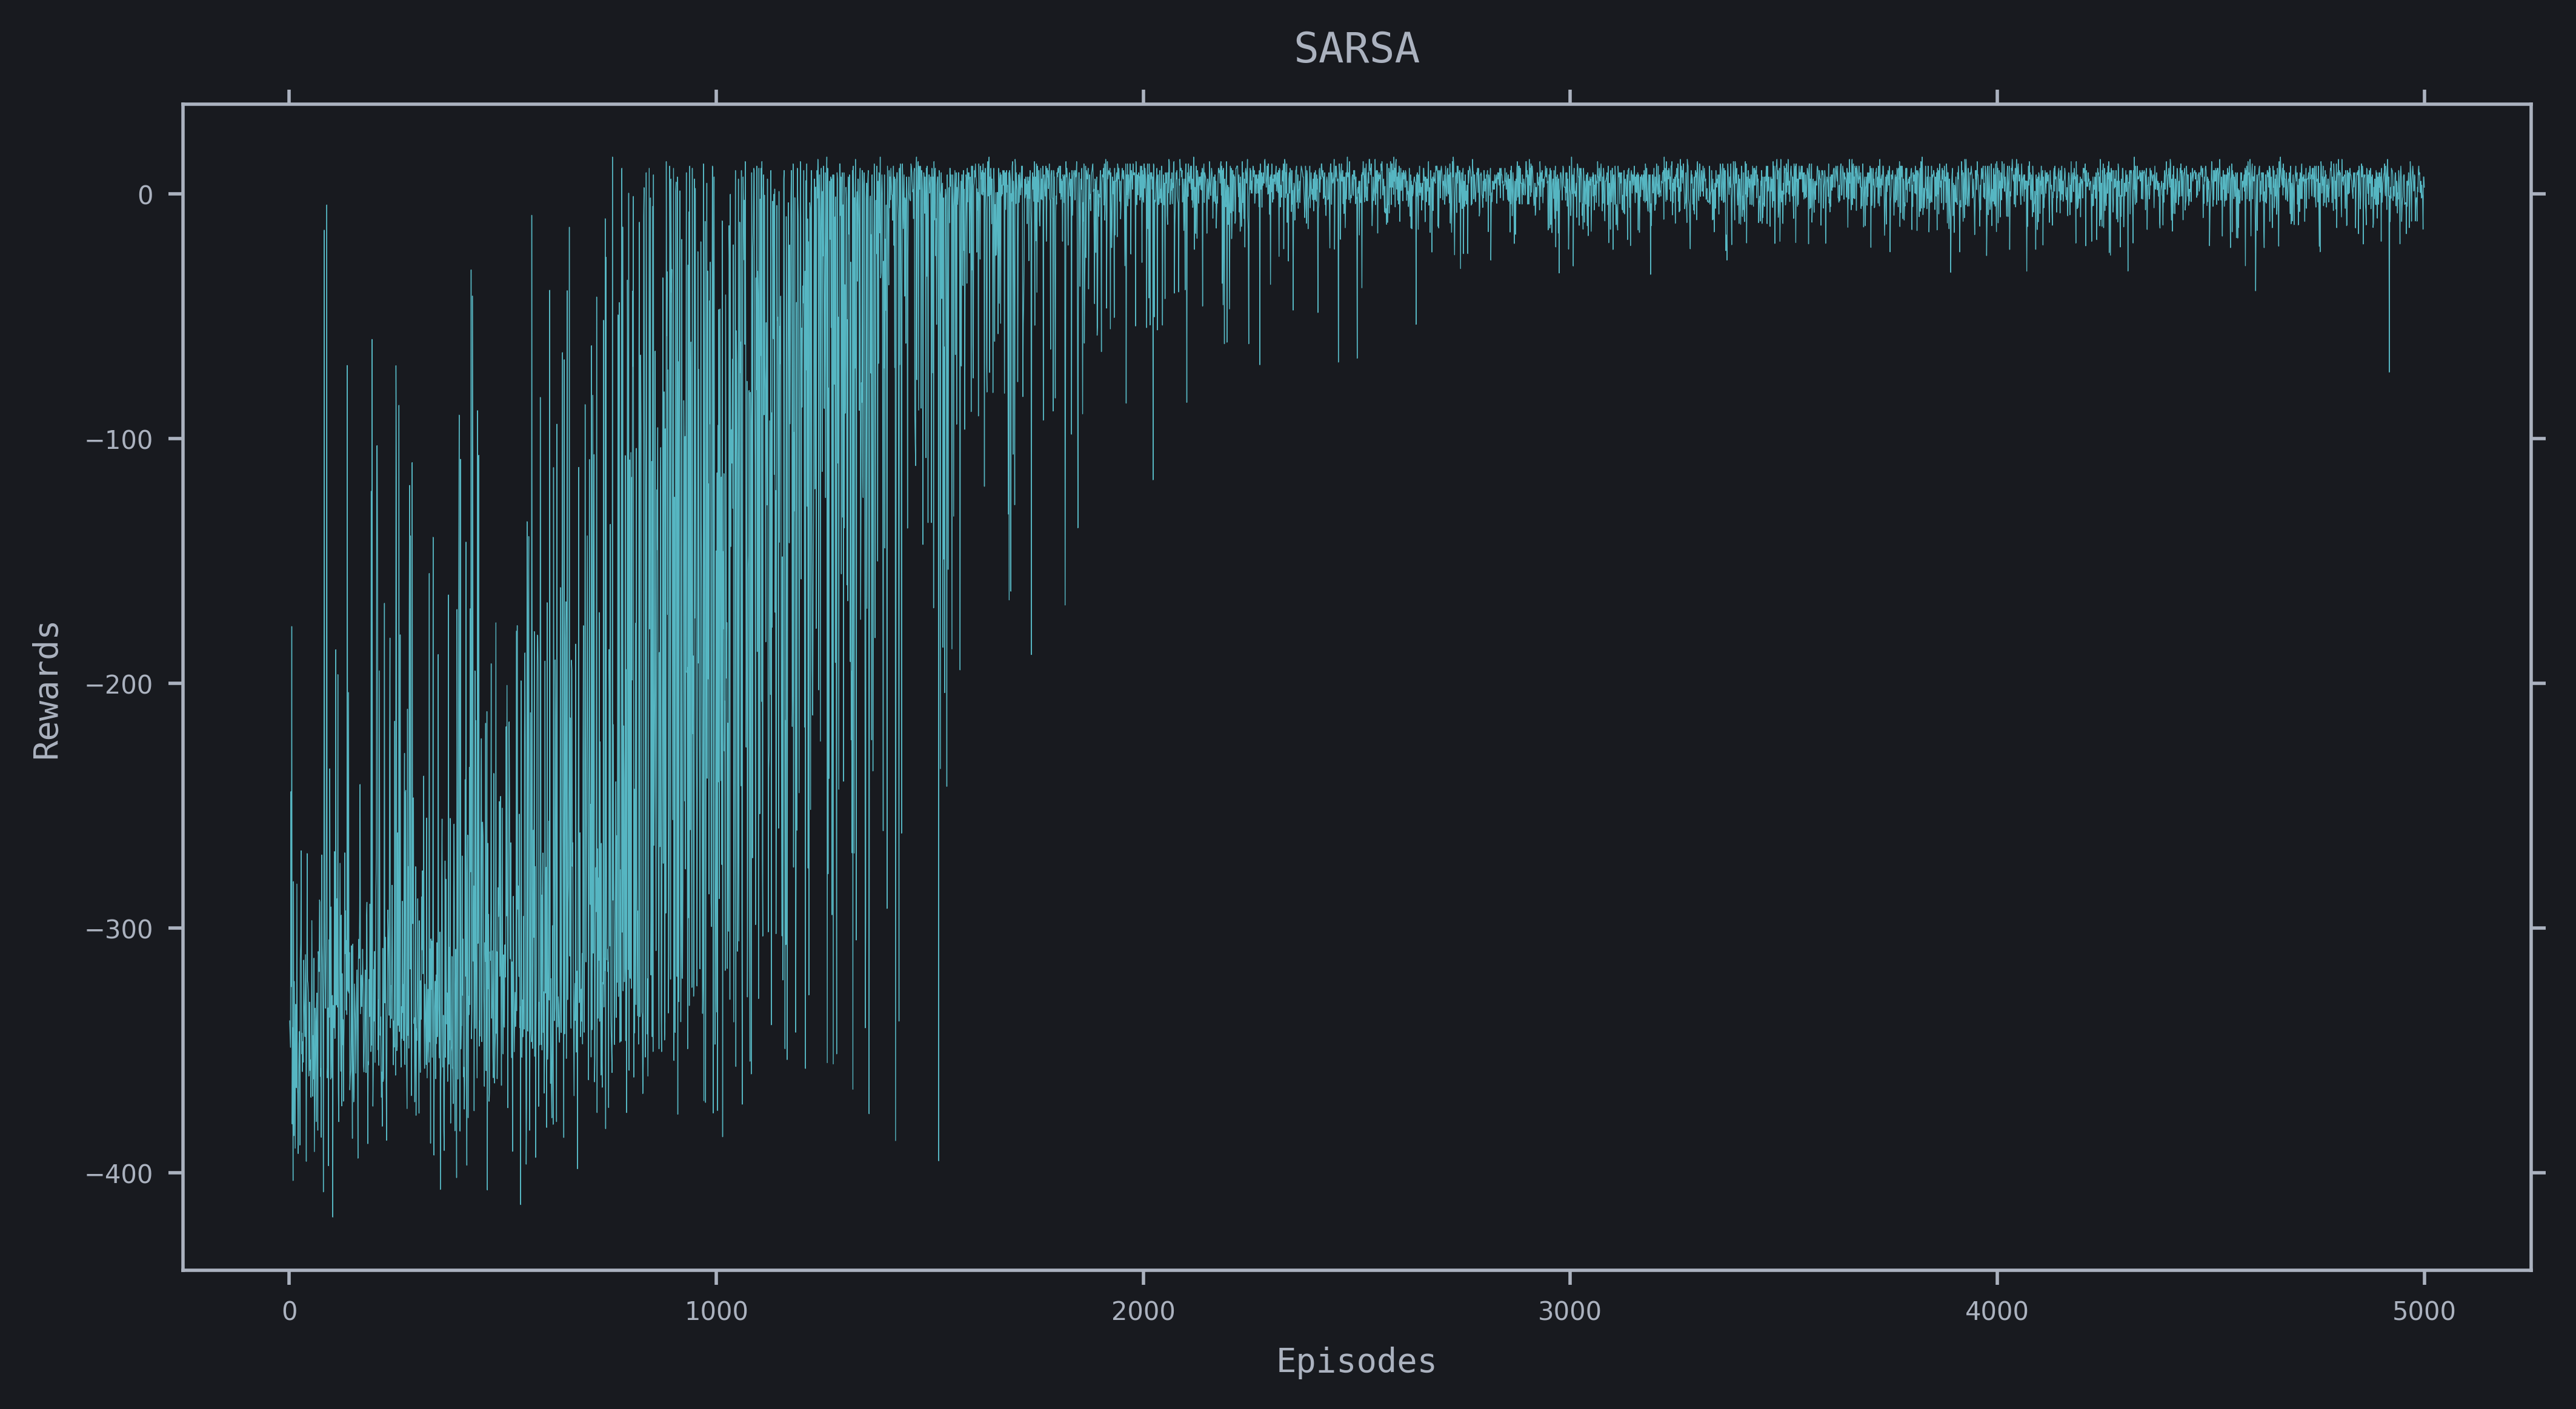

In [118]:
episodes = np.arange(1, num_episodes+1)
plt.clf()
plt.figure(figsize=(10, 5), dpi = 500, facecolor='#181A1F')
ax = plt.axes()
ax.set_facecolor('#181A1F')
plt.title("SARSA", fontsize=10, color='#abb2bf', font = 'Monospace', pad = 10)
plt.xlabel("Episodes", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plt.ylabel("Rewards", fontsize=8, color='#abb2bf', font = 'Monospace', labelpad = 5)
plotColors = ["#e5c07b", "#e06c75", "#61afef", "#98c379", "#c678dd", "#56b6c2", "#d19a66"]
plt.plot(episodes, rewards, color = plotColors[5], linewidth=0.2)
plt.tick_params(axis='both', which='major', labelsize=6)
ax.spines['bottom'].set_color('#abb2bf')
ax.spines['top'].set_color('#abb2bf')
ax.spines['left'].set_color('#abb2bf')
ax.spines['right'].set_color('#abb2bf')
ax.tick_params(axis='x', colors='#abb2bf')
ax.tick_params(axis='y', colors='#abb2bf')
plt.rcParams['axes.facecolor'] = '#1c1d27'
plt.rcParams['axes.titlecolor'] = '#abb2bf'
plt.rcParams['axes.edgecolor'] = '#abb2bf'
plt.rcParams['axes.labelcolor'] = '#abb2bf'
plt.rcParams['figure.facecolor'] = '#1c1d27'
plt.rcParams['legend.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.color'] = '#1bb2bf'
plt.rcParams['ytick.color'] = '#1bb2bf'
plt.rcParams['text.color'] = '#abb2bf'
plt.rcParams['xtick.labelcolor'] = '#abb2bf'
plt.rcParams['ytick.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.show()

SARSA outperforms the other algorithms for this environment, followed closely by Q-learning. Off-policy Monte Carlo fails to converge with the given hyperparameters.